# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [5]:
# Step 1: Import pandas to work with the data
import pandas as pd

# Step 2: Load the dataset (make sure the file is in the same folder)
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Step 3: Show basic info about the data
print("Basic Info:")
print(df.info())

# Step 4: Show summary statistics (mean, std, min, max, etc.)
print("\nSummary Statistics:")
print(df.describe())

# Step 5: Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Step 6: Check if any column has only one value (not useful for learning)
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Column '{col}' has only one unique value.")

# Step 7: Show mean, median, and mode of each column
print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])

# Step 8: Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Step 9: Check for weird values (like negative age or BMI)
print("\nRows with negative age:")
print(df[df["Age"] < 0])

print("\nRows with negative BMI:")
print(df[df["BMI"] < 0])

# Step 10: Check the balance of the target column (Diabetes_012)
print("\nHow many people in each diabetes category:")
print(df["Diabetes_012"].value_counts())
print("\nPercent of each class:")
print(df["Diabetes_012"].value_counts(normalize=True))


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  f

The dataset loaded fine.

No missing values found.

No strange (negative) values in Age or BMI.

No need to encode any columns (they are already numbers).

Class 0 (no diabetes) has most of the data — so we have class imbalance.



# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

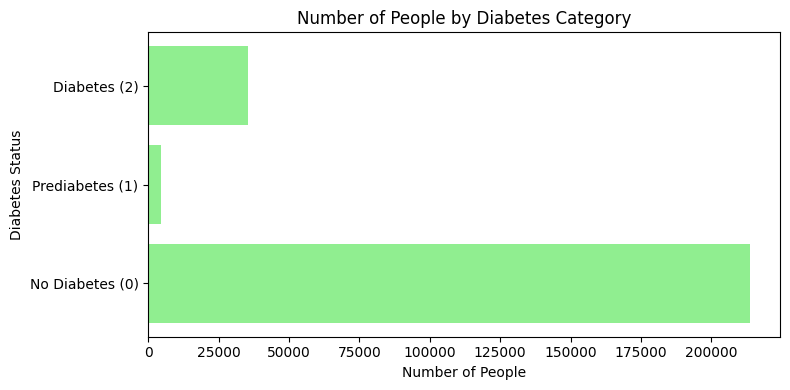

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Count values in Diabetes_012 column
counts = df["Diabetes_012"].value_counts().sort_index()
categories = ["No Diabetes (0)", "Prediabetes (1)", "Diabetes (2)"]
values = counts.values

# Create horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(categories, values, color="lightgreen")

plt.title("Number of People by Diabetes Category")
plt.xlabel("Number of People")
plt.ylabel("Diabetes Status")
plt.tight_layout()
plt.show()
